In [1]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 加载模型
model = KeyedVectors.load_word2vec_format('清洗后文本.txt')

In [27]:
word_embeddings = model.vectors
words = model.index_to_key

In [28]:
# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(word_embeddings)

In [30]:
# 找到词语的位置
word = words.index("additive")

In [31]:
# 计算 "perovskite" 与其他词语之间的余弦相似性
cosine_similarities = cosine_similarity(word_embeddings, [word_embeddings[word]])

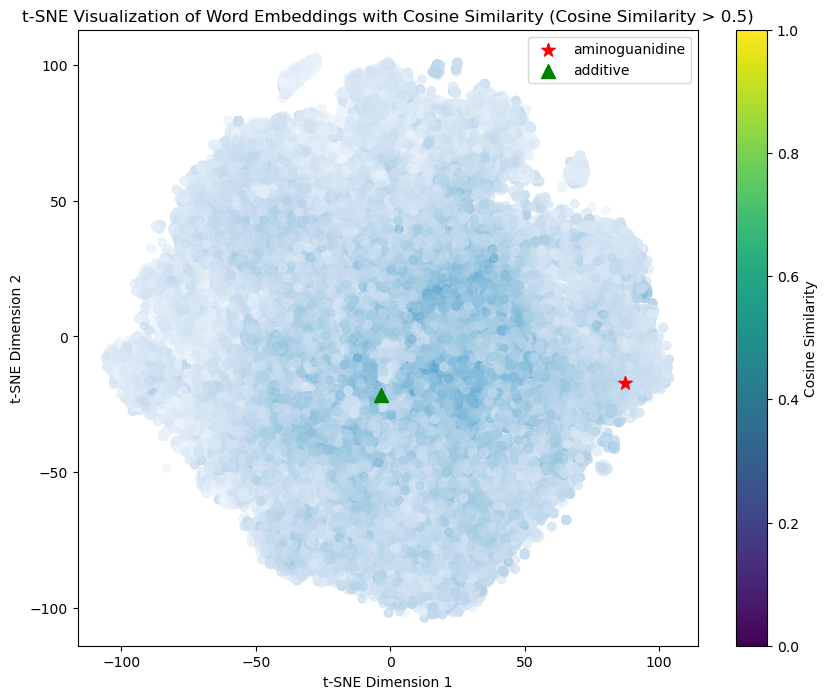

In [42]:
# 找到 "ETL" 的位置

word1_index = words.index("aminoguanidine")
word2_index = words.index("additive")

# 可视化词向量图
plt.figure(figsize=(10, 8))

# 根据余弦相似性调整颜色深浅并绘制散点图
colors = plt.cm.Blues(cosine_similarities.ravel())  # 将二维数组展平为一维，并根据余弦相似性设置颜色深浅
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=colors, alpha=0.5)

# # 只显示余弦相似性大于0.5的点
# threshold_similarity = 0.55
# for i, similarity in enumerate(cosine_similarities):
#     if similarity > threshold_similarity:
#         plt.scatter(tsne_embeddings[i, 0], tsne_embeddings[i, 1], c='violet', alpha=0.5)


plt.scatter(tsne_embeddings[word1_index, 0], tsne_embeddings[word1_index, 1], c='red', marker='*', s=100, label='aminoguanidine')

plt.scatter(tsne_embeddings[word2_index, 0], tsne_embeddings[word2_index, 1], c='green', marker='^', s=100, label='additive')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity (Cosine Similarity > 0.5)')
plt.legend()

# 添加颜色条
cbar = plt.colorbar()
cbar.set_label('Cosine Similarity')
# plt.axis([-100, 100, -60, 60])
plt.savefig('ETL_solvent.png')  # 可以将文件名修改为您想要的文件名和路径

plt.show()


In [ ]:
# 找到 "aminoguanidine" 和 "additive" 的位置
word1_index = words.index("aminoguanidine")
word2_index = words.index("additive")

# 设置颜色映射，让余弦相似度值越大颜色越蓝
cmap = plt.cm.Greens
# "Blues": 蓝色调的单色调颜色映射。
# "Greens": 绿色调的单色调颜色映射。
# "Reds": 红色调的单色调颜色映射。
# "Oranges": 橙色调的单色调颜色映射。
# "Purples": 紫色调的单色调颜色映射。
# "Greys": 灰度的单色调颜色映射。
# "BuPu": 蓝紫色渐变的渐变色颜色映射。
# "YlOrRd": 黄至橙至红的渐变色颜色映射。
# "viridis": 从深蓝到亮黄的渐变色颜色映射，被认为是色盲友好的颜色映射。
# "inferno": 从黑色到红色的渐变色颜色映射。
# "magma": 从黑色到紫色的渐变色颜色映射。
# "plasma": 从黑色到品红的渐变色颜色映射。
# "cividis": 从深蓝到黄色的渐变色颜色映射，也是色盲友好的颜色映射。
# 可视化词向量图
plt.figure(figsize=(10, 8))

# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=cosine_similarities.ravel(), cmap=cmap, alpha=0.5)

# 标记 "aminoguanidine" 和 "additive"
plt.scatter(tsne_embeddings[word1_index, 0], tsne_embeddings[word1_index, 1], c='red', marker='*', s=100, label='aminoguanidine')
plt.scatter(tsne_embeddings[word2_index, 0], tsne_embeddings[word2_index, 1], c='green', marker='^', s=100, label='additive')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')
plt.legend()

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# plt.axis([-50, 50, -60, 60])

plt.savefig('ETL_solvent.png')  # 可以将文件名修改为您想要的文件名和路径

plt.show()



In [43]:
for key, value in model.most_similar('additive', topn=100000):
    print(key)

additives
defoamer
AKOR-1
binder
antiseize
smoke-suppressant
deflocculant
alkylsalicylate
antifrictional
pro-degradant
AW/EP
ethylsilicate
surface-modifying
anti-friction
lignosulphonate
PMSya
alkylphenolate
defoamers
hydrophilizing
fluoroparaffins
polymer–cement
anti-foam
PPC-based
MASK
polymer-bitumen
erucamide
nano-MoS_3
nanomodifier
antistats
Eu-1223
shrinkage-compensating
paint-and-varnish
viscosifier
pour-point
K_2SiO_3
LiAlCl_4·3SO_2-NaAlCl_4·2SO_2
fire-retarding
extreme-pressure
ashless
OPWF
antiknock
tetraethoxyorthosilicate
I-40A
antiscoring
Lubricating
anti-foaming
Ca/Zn
ARWD
carbonate-silicate
tungsten-bearing
dispersancy
NH_4ClO_4
masteralloy
phenol—formaldehyde
CRMA
thiokol
Fillers
devulcanizing
lime-containing
18-diiodooctane
NP-360
LiODFB
DF-11
boron-bearing
ferrovanadium
rolling-contact
ENR50
prodegradant
added
modifiers
anticorrosion
antioxidizing
anti-electrostatic
NiPO-NT
modifier
salt–salt
fillers
TsIATIM-339
VRLA
carbonate-based
Ni–Al_2O_3
sulfur-fixation
OBCaSu
b